In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv("dht22 data.csv", header=None, names=['Timestamp', 'Humidity', 'Temperature'])
df.head()

,Timestamp,Humidity,Temperature
0,2024-07-20 10:37:47.756,36.9,23.4
1,2024-07-20 10:37:49.765,36.8,23.3
2,2024-07-20 10:37:51.771,36.6,23.2
3,2024-07-20 10:37:53.778,36.4,23.0
4,2024-07-20 10:37:55.784,36.6,23.0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    5791 non-null   object 
 1   Humidity     5791 non-null   float64
 2   Temperature  5791 non-null   float64
dtypes: float64(2), object(1)
memory usage: 135.9+ KB


In [112]:
# Convert 'Timestamp' feature to correct dtype
df.Timestamp = pd.to_datetime(df.Timestamp)
df.dtypes

Timestamp      datetime64[ns]
Humidity              float64
Temperature           float64
dtype: object

In [113]:
df

,Timestamp,Humidity,Temperature
0,2024-07-20 10:37:47.756,36.9,23.4
1,2024-07-20 10:37:49.765,36.8,23.3
2,2024-07-20 10:37:51.771,36.6,23.2
3,2024-07-20 10:37:53.778,36.4,23.0
4,2024-07-20 10:37:55.784,36.6,23.0
...,...,...,...
5786,2024-07-20 13:51:19.231,54.9,18.8
5787,2024-07-20 13:51:21.239,54.8,18.8
5788,2024-07-20 13:51:23.245,54.7,18.8
5789,2024-07-20 13:51:25.252,54.6,18.7


In [114]:
# set 'Timestamp' as index
df2 = df.copy()
df2.set_index('Timestamp', inplace=True)
df2.head(3)

,Humidity,Temperature
Timestamp,,
2024-07-20 10:37:47.756,36.9,23.4
2024-07-20 10:37:49.765,36.8,23.3
2024-07-20 10:37:51.771,36.6,23.2


Text(0.5, 1.0, 'Humidity Time series')

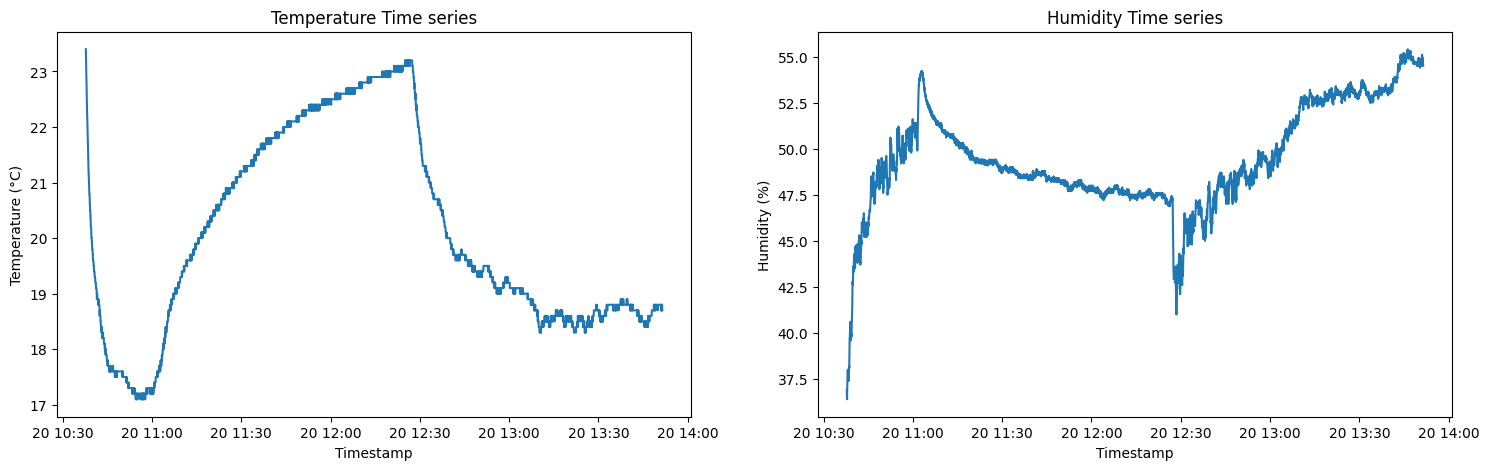

In [123]:
plt.figure(figsize=(18, 5))

# Plot the time series plot of Temp
plt.subplot(1, 2, 1)
plt.plot(df2.index, df2.Temperature)
plt.ylabel('Temperature (°C)')
plt.xlabel('Timestamp')
plt.title('Temperature Time series')

# Plot the time series plot of Humid
plt.subplot(1, 2, 2)
plt.plot(df2.index, df2.Humidity)
plt.ylabel('Humidity (%)')
plt.xlabel('Timestamp')
plt.title('Humidity Time series')

I have used the DHT22 to record the temperature and humidity data in my room from around 10:30AM to 2PM. In the Temperature plot, initially, the temperature is quite high, since that was when I just turned off the heating and opened the window. Then the temperature started to drop from 23 to 17 degrees. After which, I felt cold, so I closed the window and turned on the heating. Then at around 12:30AM, I felt hot again, so I turned off the heating and opened the window, so the Temperature once again dropped. The humidity data seems to be reverse of the temperature data. So, when the temperature is high, the humidity is low, and vice versa when the temperature is low, the humidity is high.

Text(0.5, 1.0, 'Humidity Time series')

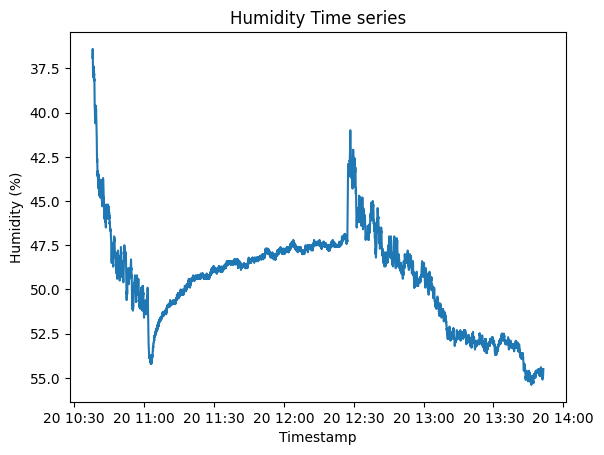

In [124]:
plt.plot(df2.index, df2.Humidity)
plt.gca().invert_yaxis()
plt.ylabel('Humidity (%)')
plt.xlabel('Timestamp')
plt.title('Humidity Time series')

This plot reverse on the y-axis, we can see that the humid is reverse of temperature.